In [1]:
import ils.cfsdp as cfs
import ils.utils as ut
from sklearn.metrics.pairwise import pairwise_distances
import warnings
warnings.filterwarnings("ignore")

In [2]:
X = ut.synthetic_data()
X[0]

,x,y
ID,,
0,-1.642776,-0.603108
1,-0.121293,1.774577
2,1.641291,-1.035853
3,0.177508,1.913364
4,-0.844622,0.675511
...,...,...
1495,-1.231340,1.245420
1496,0.619676,-0.807152
1497,-1.862813,0.567513


In [3]:
def test_cfsdp(data):
    distance_matrix = pairwise_distances(data)
    dc, dc_value_list, field = cfs.choose_dc(distance_matrix)
    dc = cfs.calculate_dc(distance_matrix, 1.2)
    print(dc)
    density = cfs.continuous_density(distance_matrix, dc)
    delta_matrix, closest_point = cfs.delta_function(distance_matrix, density) 
    cfs.density_delta(density, delta_matrix, data)
    # A hint for choosing the number of centers is provided by the plot of yi sorted in decreasing order
    scores = cfs.choosing_centernumber(density, delta_matrix)
    index = cfs.top_k_idx(scores, 2)
    cfs.applyILS(data, data, index, ut.colors)
    return scores, index

0.14897128809916405


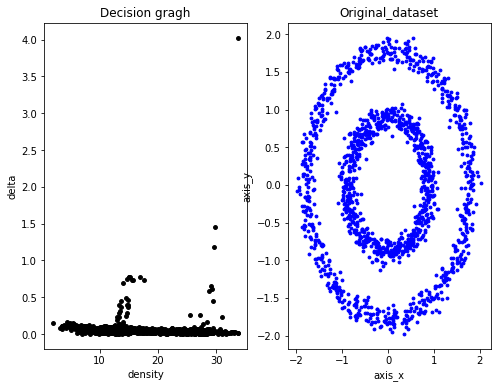

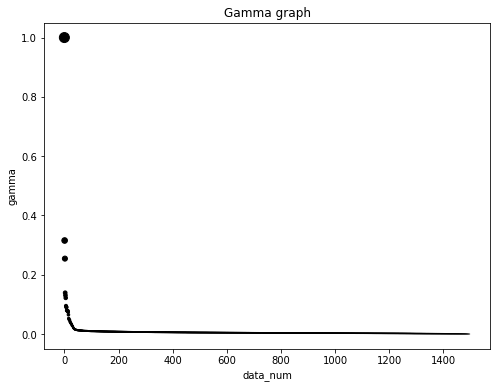

[1.0, 0.3155431889118593]
3
The number of clusters: 2


In [ ]:
scores, index = test_cfsdp(X[0])

In [ ]:
cfs.plot_centroid(X[0], index)

In [ ]:
test_cfsdp(X[1])